In [5]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import requests
import io
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Laboratorio 1: Análisis Exploratorio de Datos

In [6]:
# Cargar datos usando requests
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL)
df = pd.read_csv(io.BytesIO(response.content))

# Mostrar primeras filas
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [7]:
# Información básica del dataset
print("Dimensiones del dataset:", df.shape)
print("\nInformación del dataset:")
df.info()
print("\nEstadísticas descriptivas:")
df.describe()

Dimensiones del dataset: (90, 18)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


In [8]:
# Verificar valores nulos
print("Valores nulos por columna:")
df.isnull().sum()

Valores nulos por columna:


FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
Class              0
dtype: int64

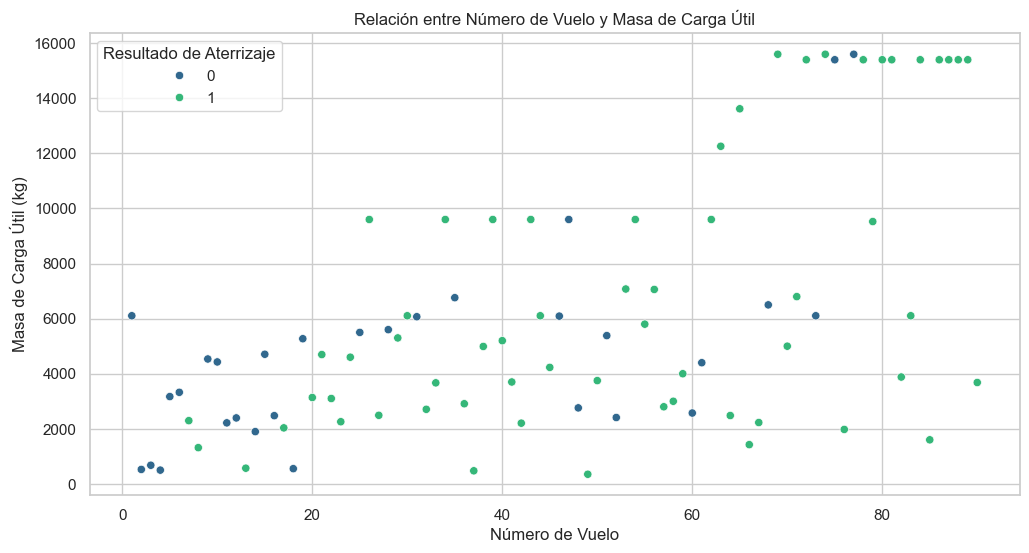

In [9]:
# Visualizar relación entre FlightNumber y PayloadMass
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='FlightNumber', y='PayloadMass', hue='Class', palette='viridis')
plt.title('Relación entre Número de Vuelo y Masa de Carga Útil')
plt.xlabel('Número de Vuelo')
plt.ylabel('Masa de Carga Útil (kg)')
plt.legend(title='Resultado de Aterrizaje')
plt.show()

<Figure size 1200x800 with 0 Axes>

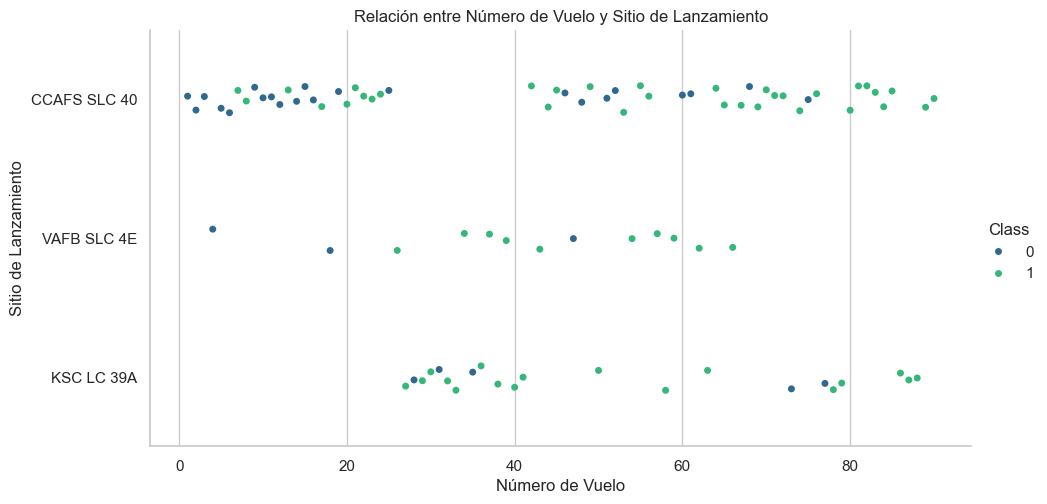

In [10]:
# Visualizar relación entre FlightNumber y LaunchSite
plt.figure(figsize=(12, 8))
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=2, palette='viridis')
plt.title('Relación entre Número de Vuelo y Sitio de Lanzamiento')
plt.xlabel('Número de Vuelo')
plt.ylabel('Sitio de Lanzamiento')
plt.show()

<Figure size 1200x800 with 0 Axes>

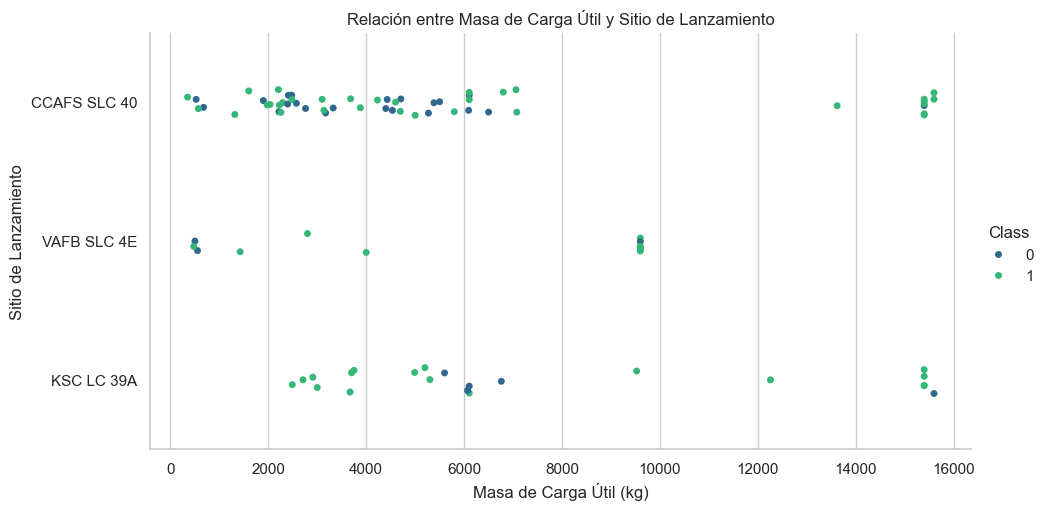

In [11]:
# Visualizar relación entre PayloadMass y LaunchSite
plt.figure(figsize=(12, 8))
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect=2, palette='viridis')
plt.title('Relación entre Masa de Carga Útil y Sitio de Lanzamiento')
plt.xlabel('Masa de Carga Útil (kg)')
plt.ylabel('Sitio de Lanzamiento')
plt.show()

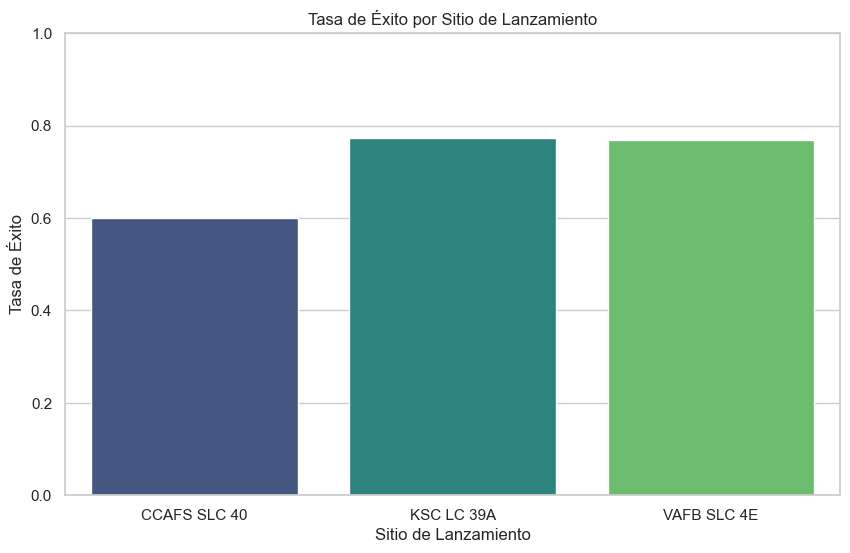

In [12]:
# Calcular tasa de éxito por sitio de lanzamiento
success_rate = df.groupby('LaunchSite')['Class'].mean().reset_index()
success_rate.columns = ['LaunchSite', 'SuccessRate']

plt.figure(figsize=(10, 6))
sns.barplot(x='LaunchSite', y='SuccessRate', data=success_rate, palette='viridis')
plt.title('Tasa de Éxito por Sitio de Lanzamiento')
plt.xlabel('Sitio de Lanzamiento')
plt.ylabel('Tasa de Éxito')
plt.ylim(0, 1)
plt.show()

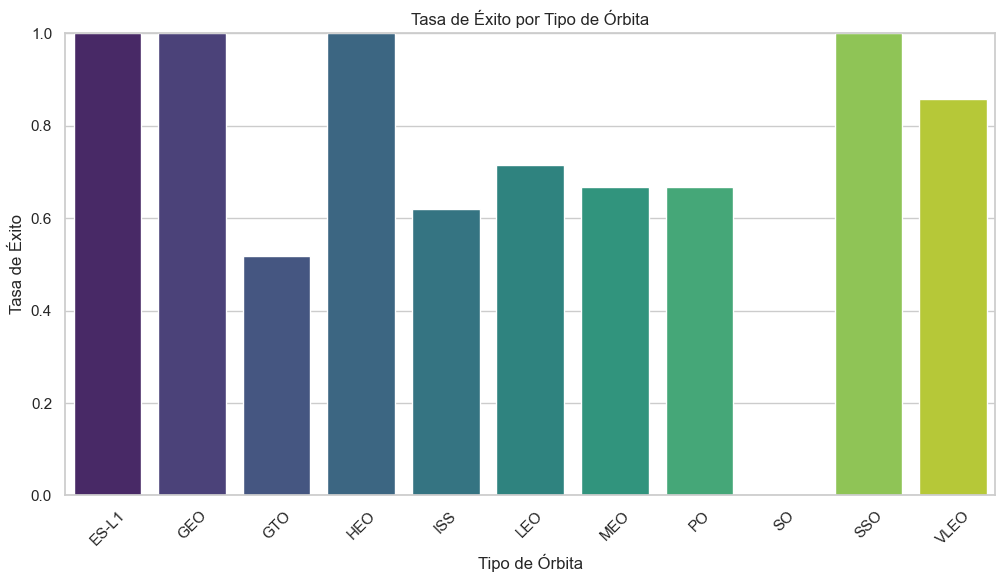

In [13]:
# Visualizar relación entre órbitas y tasa de éxito
orbit_success = df.groupby('Orbit')['Class'].mean().reset_index()
orbit_success.columns = ['Orbit', 'SuccessRate']

plt.figure(figsize=(12, 6))
sns.barplot(x='Orbit', y='SuccessRate', data=orbit_success, palette='viridis')
plt.title('Tasa de Éxito por Tipo de Órbita')
plt.xlabel('Tipo de Órbita')
plt.ylabel('Tasa de Éxito')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

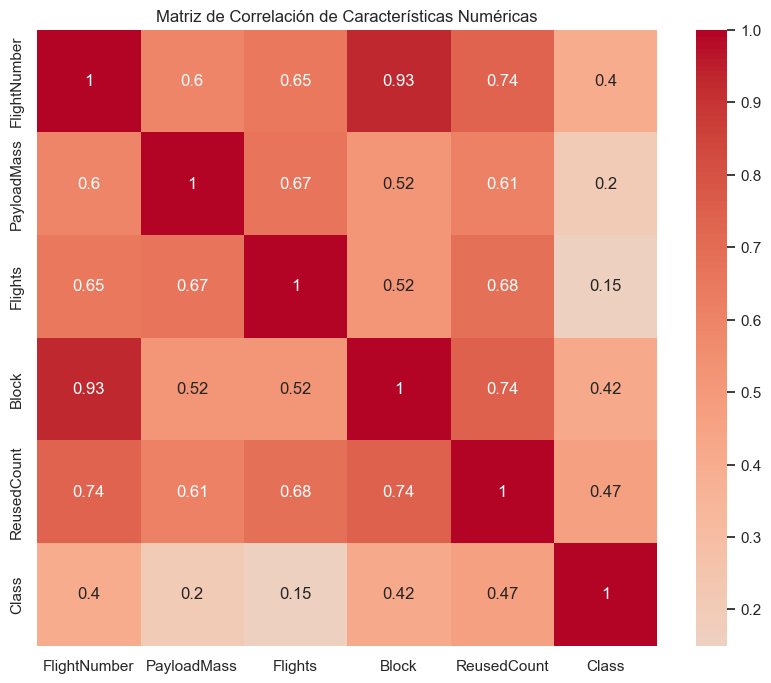

In [14]:
# Análisis de características numéricas
numeric_features = ['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount']
df_numeric = df[numeric_features + ['Class']]

# Matriz de correlación
corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Características Numéricas')
plt.show()

## Laboratorio 2: Ingeniería de Características y Modelado

In [15]:
# Crear características adicionales
df['PayloadMass_Group'] = pd.cut(df['PayloadMass'], bins=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])
df['FlightNumber_Group'] = pd.cut(df['FlightNumber'], bins=5, labels=['Inicial', 'Temprano', 'Medio', 'Tardío', 'Final'])

# Codificar variables categóricas
label_encoders = {}
categorical_cols = ['LaunchSite', 'Orbit', 'PayloadMass_Group', 'FlightNumber_Group']

for col in categorical_cols:
    le = LabelEncoder()
    df[col + '_Encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le

# Preparar datos para modelado
features = ['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount'] + [col + '_Encoded' for col in categorical_cols]
X = df[features]
y = df['Class']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dimensiones de los conjuntos de entrenamiento y prueba:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Dimensiones de los conjuntos de entrenamiento y prueba:
X_train: (72, 9)
X_test: (18, 9)
y_train: (72,)
y_test: (18,)


In [16]:
# Entrenar modelo de regresión logística
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predecir y evaluar el modelo
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precisión del modelo: {accuracy:.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.7778

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.83      0.83      0.83        12

    accuracy                           0.78        18
   macro avg       0.75      0.75      0.75        18
weighted avg       0.78      0.78      0.78        18



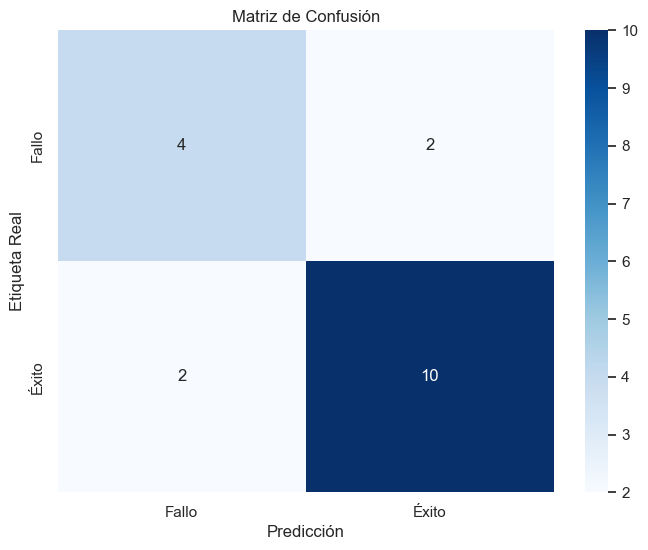

In [17]:
# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fallo', 'Éxito'], 
            yticklabels=['Fallo', 'Éxito'])
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Predicción')
plt.show()

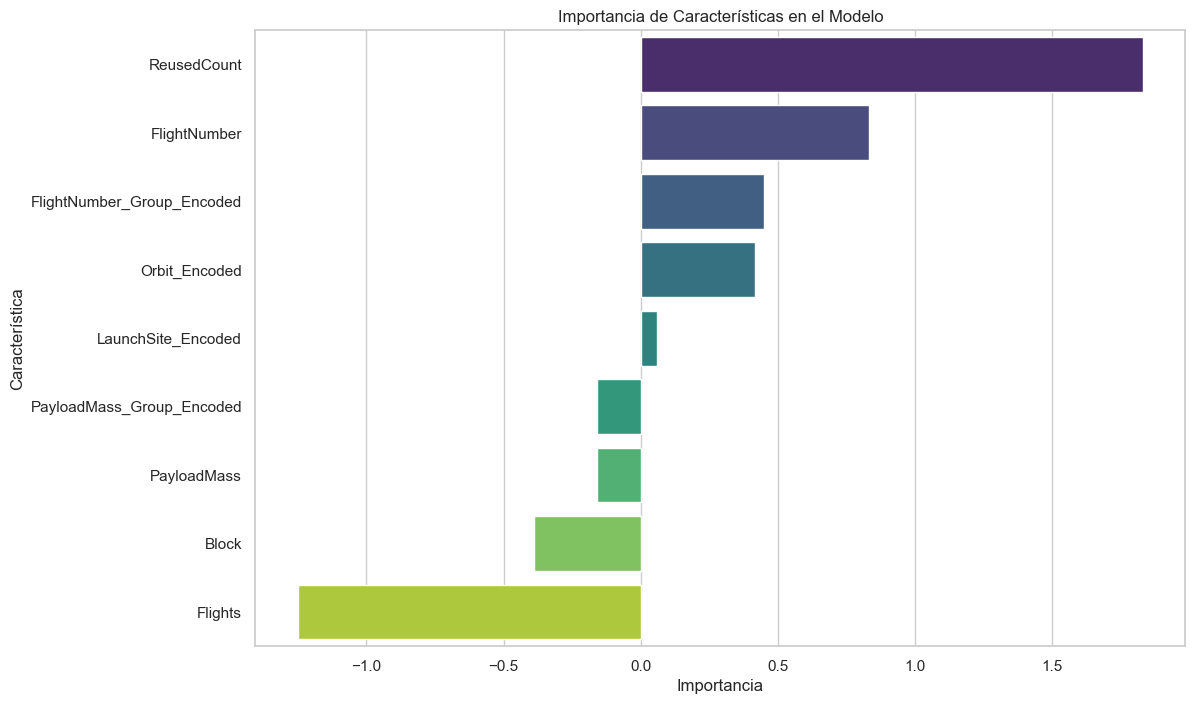

In [18]:
# Importancia de características
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.coef_[0]
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Importancia de Características en el Modelo')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

In [19]:
# Análisis de errores
errors = X_test.copy()
errors['Actual'] = y_test
errors['Predicted'] = y_pred
errors['Correct'] = errors['Actual'] == errors['Predicted']

# Casos donde el modelo falló
misclassified = errors[errors['Correct'] == False]
print(f"Número de predicciones incorrectas: {len(misclassified)}")
print("\nDistribución de errores por sitio de lanzamiento:")
if 'LaunchSite' in df.columns:
    misclassified_sites = misclassified.merge(df[['LaunchSite']], left_index=True, right_index=True)
    print(misclassified_sites['LaunchSite'].value_counts())

Número de predicciones incorrectas: 4

Distribución de errores por sitio de lanzamiento:
LaunchSite
CCAFS SLC 40    2
VAFB SLC 4E     1
KSC LC 39A      1
Name: count, dtype: int64


## Análisis de Resultados y Conclusiones


In [20]:
# Resumen de hallazgos
print("RESUMEN DE HALLAZGOS - FASE 2")
print("="*50)

# 1. Tasa de éxito general
success_rate = df['Class'].mean()
print(f"1. Tasa de éxito general: {success_rate:.2%}")

# 2. Mejores sitios de lanzamiento
site_success = df.groupby('LaunchSite')['Class'].mean().reset_index()
best_site = site_success.loc[site_success['Class'].idxmax()]
print(f"2. Sitio con mayor tasa de éxito: {best_site['LaunchSite']} ({best_site['Class']:.2%})")

# 3. Mejores órbitas
orbit_success = df.groupby('Orbit')['Class'].mean().reset_index()
best_orbit = orbit_success.loc[orbit_success['Class'].idxmax()]
print(f"3. Órbita con mayor tasa de éxito: {best_orbit['Orbit']} ({best_orbit['Class']:.2%})")

# 4. Precisión del modelo
print(f"4. Precisión del modelo predictivo: {accuracy:.2%}")

# 5. Características más importantes
top_feature = feature_importance.iloc[0]
print(f"5. Característica más predictiva: {top_feature['Feature']} (importancia: {top_feature['Importance']:.4f})")

print("\nCONCLUSIONES:")
print("- El número de vuelo y la masa de carga útil están correlacionados con el éxito del aterrizaje")
print("- Algunos sitios de lanzamiento tienen tasas de éxito significativamente más altas")
print("- Ciertos tipos de órbitas están asociados con mayores probabilidades de éxito")
print("- El modelo de regresión logística puede predecir el resultado con precisión moderada")
print("- Las características de reutilización (Flights, ReusedCount) son factores importantes")

RESUMEN DE HALLAZGOS - FASE 2
1. Tasa de éxito general: 66.67%
2. Sitio con mayor tasa de éxito: KSC LC 39A (77.27%)
3. Órbita con mayor tasa de éxito: ES-L1 (100.00%)
4. Precisión del modelo predictivo: 77.78%
5. Característica más predictiva: ReusedCount (importancia: 1.8328)

CONCLUSIONES:
- El número de vuelo y la masa de carga útil están correlacionados con el éxito del aterrizaje
- Algunos sitios de lanzamiento tienen tasas de éxito significativamente más altas
- Ciertos tipos de órbitas están asociados con mayores probabilidades de éxito
- El modelo de regresión logística puede predecir el resultado con precisión moderada
- Las características de reutilización (Flights, ReusedCount) son factores importantes
